In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np

In [3]:
# Load the CSV Data
csv_file_path = 'evolution_data.csv'  # Path to the CSV file
df = pd.read_csv(csv_file_path)  # Load the CSV data into a pandas DataFrame

# Display the first few rows of the DataFrame to verify the data
df.head()

,Run,Generation,Leg Index,Individual Index,Fitness,Amplitude,Phase,Offset
0,1,0,0,0,7.713496,"[0.093756923306418, 0.26394521744211497, 0.309...","[5.062000199545342, 5.317605599133836, 5.96593...","[-0.44628920254020976, 0.13808326019824535, 0...."
1,1,0,0,1,7.799334,"[0.11488838600974338, 0.4406774048361033, 0.44...","[0.5053071334876843, 2.6706480235423333, 4.076...","[-0.40364076825167206, -0.3466842782426065, -0..."
2,1,0,0,2,7.147010,"[0.20229576839881125, 0.33625319633704953, 0.3...","[0.04514769611847761, 2.0391430165138975, 6.17...","[-0.4126088030625614, -0.06261368767212083, 0...."
3,1,0,0,3,5.595903,"[0.329294710303729, 0.06207599831810445, 0.065...","[4.81578141154062, 5.731064968418777, 1.408881...","[0.027111901198106025, -0.07707597161414903, 0..."
4,1,0,0,4,7.476579,"[0.07537940216655531, 0.3053074350931897, 0.49...","[2.5223090416515124, 0.11594834749739444, 5.63...","[-0.36264836238213316, 0.03429959365579727, -0..."


In [4]:
# Parse the Data
# Extract relevant columns from the DataFrame
fitness_values = df.iloc[:, 4]  # Assuming the fitness values are in the 5th column
generation_numbers = df.iloc[:, 0]  # Assuming the generation numbers are in the 1st column

# Convert the fitness values to numeric, if they are not already
fitness_values = pd.to_numeric(fitness_values, errors='coerce')

# Combine the generation numbers and fitness values into a new DataFrame
parsed_data = pd.DataFrame({
    'Generation': generation_numbers,
    'Fitness': fitness_values
})

# Display the first few rows of the parsed data to verify
parsed_data.head()

,Generation,Fitness
0,1,7.713496
1,1,7.799334
2,1,7.147010
3,1,5.595903
4,1,7.476579


In [5]:
# Find the Generation with Maximum Fitness
# Group the data by generation and calculate the maximum fitness for each generation
max_fitness_per_generation = parsed_data.groupby('Generation')['Fitness'].max()

# Identify the generation with the maximum fitness value
max_fitness_generation = max_fitness_per_generation.idxmax()
max_fitness_value = max_fitness_per_generation.max()

# Display the generation with the maximum fitness value and the corresponding fitness value
print(f"Generation with maximum fitness: {max_fitness_generation}")
print(f"Maximum fitness value: {max_fitness_value}")

Generation with maximum fitness: 274
Maximum fitness value: 46.9503098895702


Generation with maximum fitness: 274
Maximum fitness value: 46.9503098895702


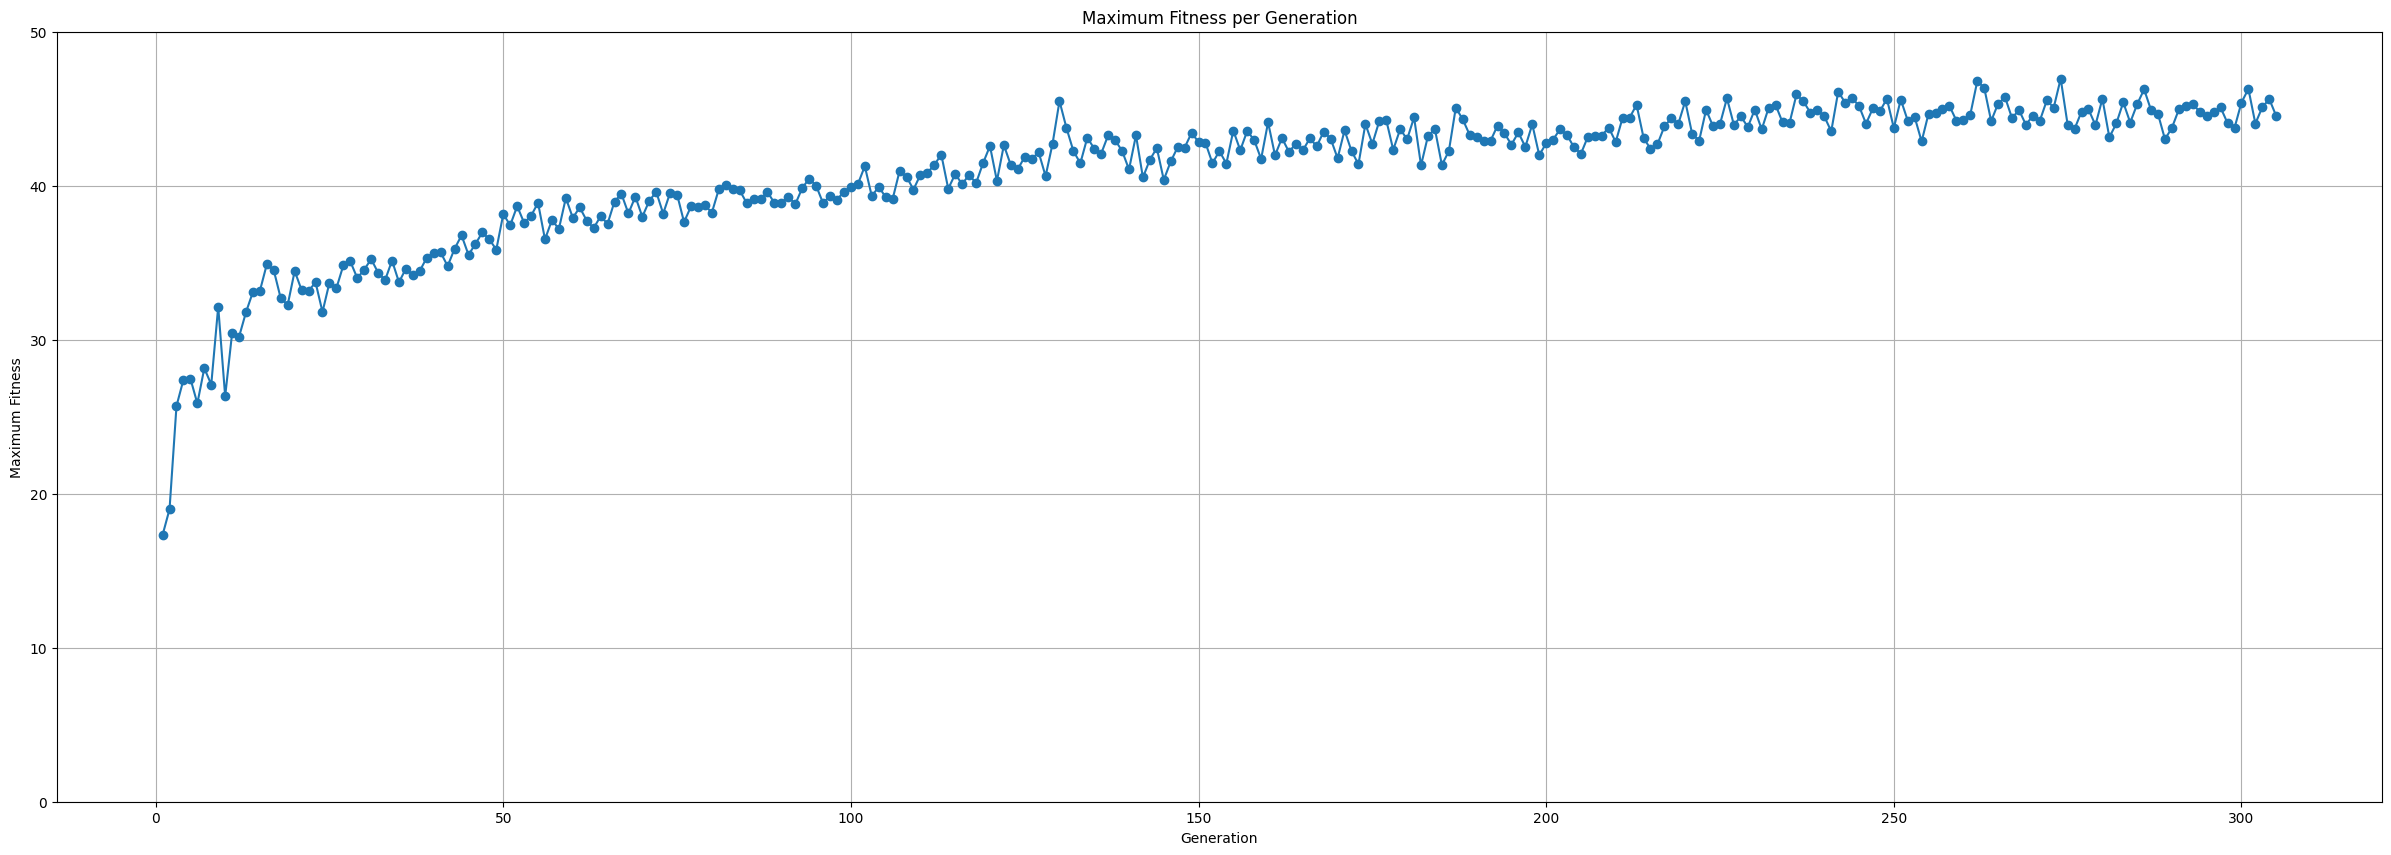

In [11]:
# Display the Results
import matplotlib.pyplot as plt

# Display the generation with the maximum fitness value and the corresponding fitness value
print(f"Generation with maximum fitness: {max_fitness_generation}")
print(f"Maximum fitness value: {max_fitness_value}")

# Plot the maximum fitness values per generation

plt.figure(figsize=(30, 10))
plt.plot(max_fitness_per_generation.index, max_fitness_per_generation.values, marker='o')
plt.title('Maximum Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Maximum Fitness')
plt.grid(True)

# Set y-axis limits
plt.ylim(0, 50)

plt.show()

In [7]:
# Find best individuals of a given generation

# Load the CSV data
data = pd.read_csv('evolution_data.csv')

def find_max_fitness_individuals(generation):
    # Filter data for the specified generation
    gen_data = data[data['Generation'] == generation]
    
    # Find the maximum fitness individual for each leg
    max_fitness_individuals = gen_data.loc[gen_data.groupby('Leg Index')['Fitness'].idxmax()]
    
    # Print the results
    for index, row in max_fitness_individuals.iterrows():
        print(f"Generation {int(row['Generation'])}, Leg {int(row['Leg Index'])}, Best Fitness: {row['Fitness']:.3f}, Amplitude: {row['Amplitude']}, Phase: {row['Phase']}, Offset: {row['Offset']}")

# Example usage: find max fitness individuals for generation 0
find_max_fitness_individuals(173)

Generation 173, Leg 0, Best Fitness: 39.810, Amplitude: [0.4501489163164084, 0.42420826105302595, 0.47669491749399245], Phase: [2.3023960138909927, 2.729004182307483, 3.2150844302297563], Offset: [-0.3114478510767132, -0.3211090586732056, -0.28721053840166494]
Generation 173, Leg 1, Best Fitness: 39.094, Amplitude: [0.03168915586036722, 0.4189903959238899, 0.2937702011918362], Phase: [2.41837725577025, 3.9923661607487606, 0.9370756141737562], Offset: [-0.2614485460138348, 0.14271419064356544, -0.37486091527243603]
Generation 173, Leg 2, Best Fitness: 44.010, Amplitude: [0.4289255812540434, 0.4200971025109508, -0.00752833505105209], Phase: [0.37930068656949606, 1.2327866455006435, 1.256911428848885], Offset: [-0.3274508306090702, 0.29590518645753594, 0.3432748274901236]
Generation 173, Leg 4, Best Fitness: 42.918, Amplitude: [0.6494275722661191, 0.4985340136044536, 0.3095199504061974], Phase: [1.3346813147835028, 5.244664854036416, 0.1962692822500775], Offset: [-0.09912183970852285, -0.